In [14]:
import numpy as np
import matplotlib.pyplot as plt
from imp import reload
from skimage import img_as_float
from skimage import morphology
import sys
sys.path.insert(0, '..')
import utilities as ut

In [ ]:
reload(ut)

In [2]:
from skimage import filters

In [3]:
hst = img_as_float(ut.read_hyperstack('data/wt_gbe_20180110.h5'))

In [4]:
img = hst[0]

In [ ]:
for i in range(0,166,10):
    fig,ax = plt.subplots()
    ax.imshow(hst[i,300:800,:])

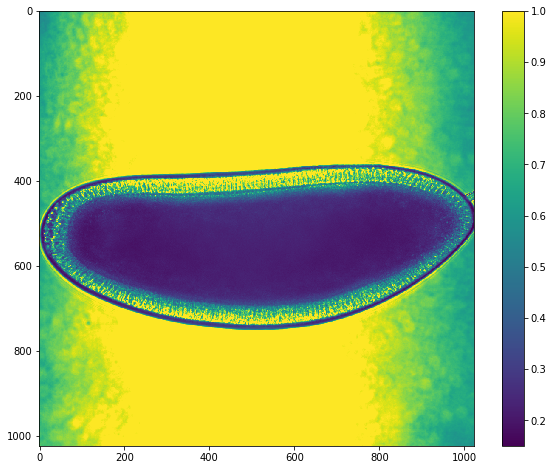

In [6]:
ut.imshow(img)

# Background segmentation

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

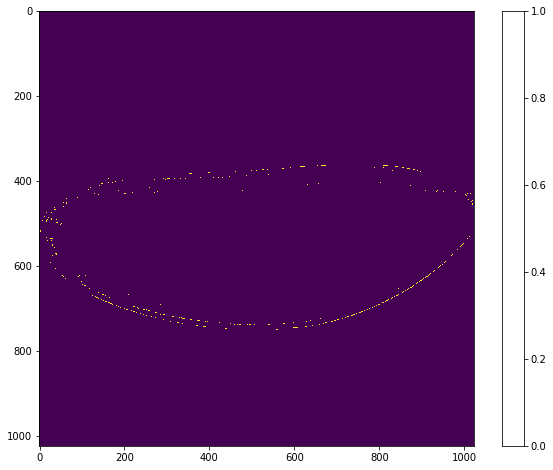

In [65]:
sobel = filters.sobel(img)
ut.imshow(sobel>0.3)

In [58]:
from skimage.feature import canny

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

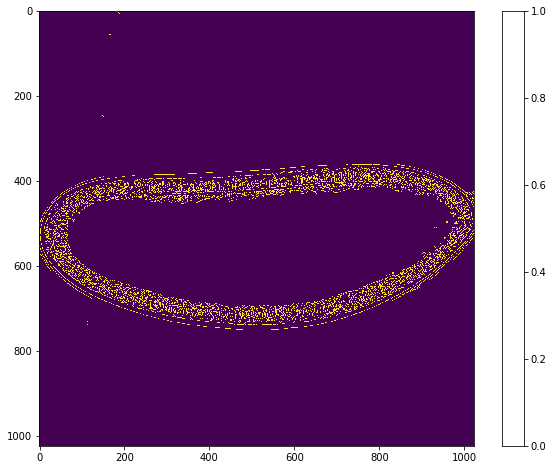

In [60]:
edgecanny = canny(img)
ut.imshow(edgecanny)

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

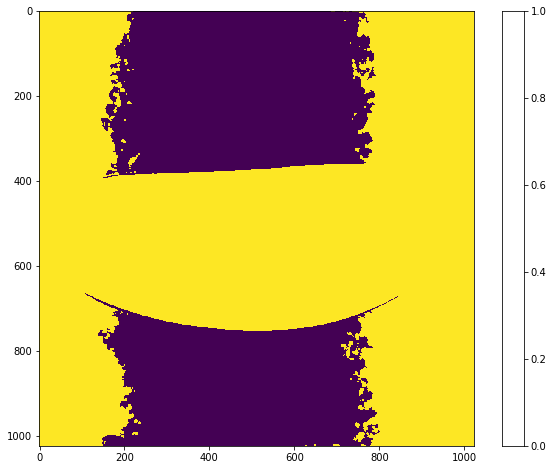

In [55]:
from scipy import ndimage as ndi
filledge = ndi.binary_fill_holes(sobel)
ut.imshow(filledge)

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

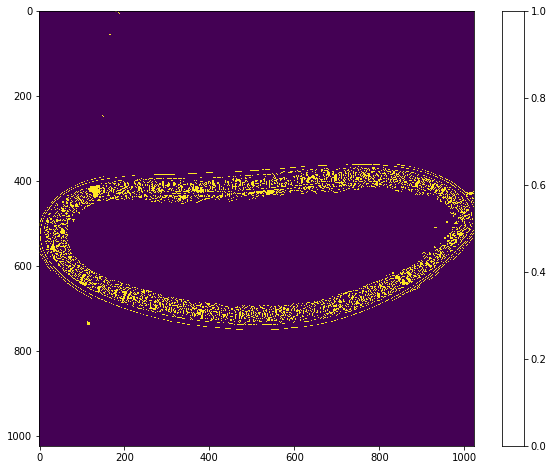

In [62]:
fillcanny = ndi.binary_fill_holes(edgecanny)
ut.imshow(fillcanny)

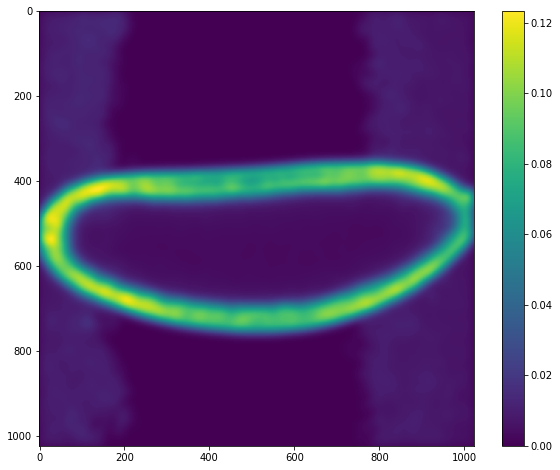

In [29]:
blurred = filters.gaussian(sobel,sigma=12)
ut.imshow(blurred)

(98303, 2)

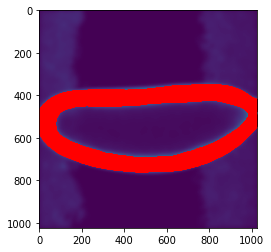

In [32]:
light_spots = np.array((blurred > 0.07).nonzero()).T #trying blurred imagie instead of raw
plt.scatter(light_spots[:,1],light_spots[:,0],c='r')
plt.imshow(blurred)
light_spots.shape

(885058, 2)

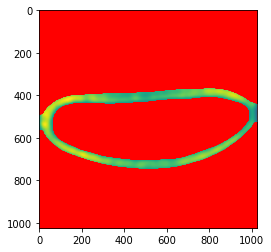

In [33]:
dark_spots = np.array((blurred<0.03).nonzero()).T
plt.scatter(dark_spots[:,1],dark_spots[:,0],c='red')
plt.imshow(blurred)
dark_spots.shape

(4, None)

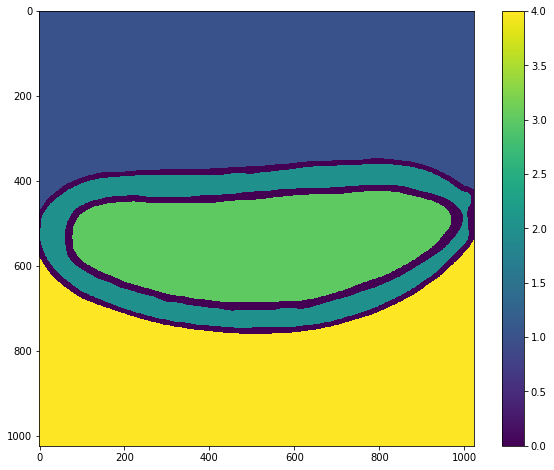

In [39]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds,ut.imshow(seed_mask)

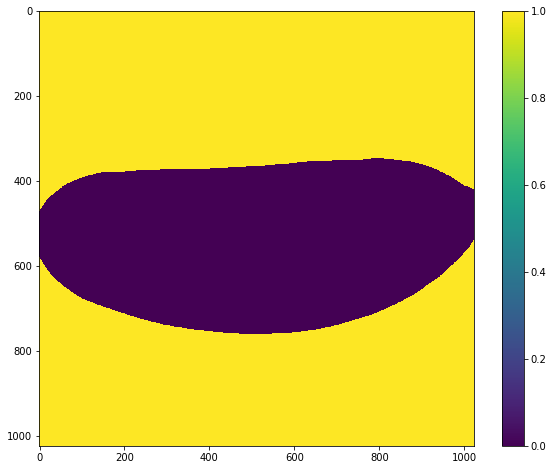

In [44]:
mask = np.zeros_like(seed_mask)
mask = mask + (seed_mask==1)
mask = mask + (seed_mask/4==1)
ut.imshow(mask)

In [45]:
mimg = img.copy()

In [50]:
bmask = (mask.astype('bool'))

In [51]:
mimg[bmask] = 0

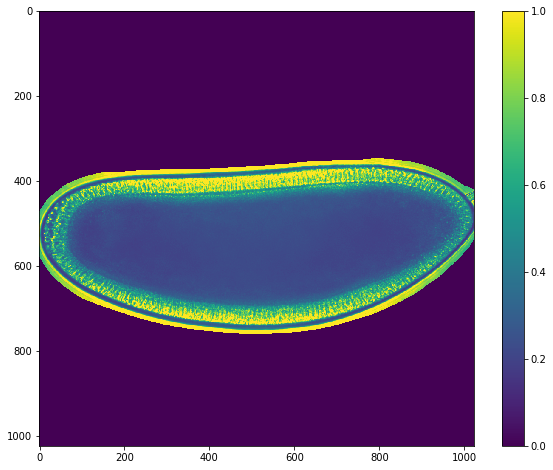

In [52]:
ut.imshow(mimg)

In [53]:
from skimage.morphology import erosion,disk

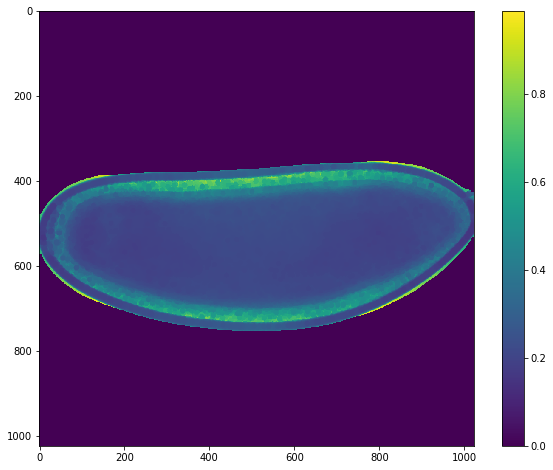

In [54]:
selem = disk(6)
eroded = erosion(mimg,selem)
ut.imshow(eroded)

In [36]:
np.unique(seed_mask)

array([0, 1, 2, 3, 4], dtype=int32)

/Users/Morgan/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


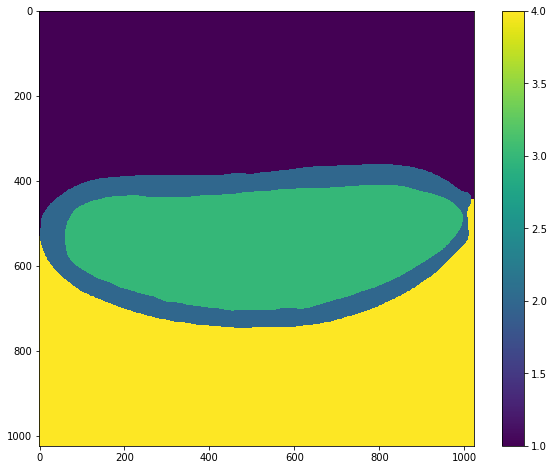

In [38]:
ws = morphology.watershed(blurred,seed_mask)
ut.imshow(ws)

In [23]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]),cmap='Greens')

In [19]:
background_candidates = sorted(set(ws.ravel()), key=lambda g: np.sum(ws == g), reverse=True)

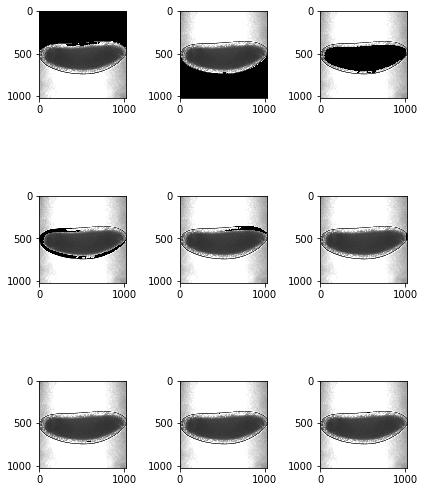

In [24]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6, 8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i], ws, img)
plt.tight_layout()

In [ ]:
seed_mask = np.zeros(img.shape,dtype=np.int)
# seed_mask[15,100] = 1
# seed_mask[55,200] = 2
seed_mask[600,200] = 1
seed_mask[600,800] = 1
seed_mask[600,500] = 2
plt.imshow(seed_mask)

In [ ]:
ws = morphology.watershed(blurred,seed_mask)
plt.imshow(ws)
plt.scatter([600,600,600],[200,500,800])